In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import tqdm.notebook as tqdm
from matplotlib import pyplot as plt

In [6]:
output_folders = [f'output/d{i}k' for i in range(12,22,2)]
output_folders

['output_d12k_50repl',
 'output_d14k_50repl',
 'output_d16k_50repl',
 'output_d18k_50repl',
 'output_d20k_50repl']

In [7]:
passenger_details = []
for folder in output_folders:
    p = pd.read_parquet(f'{folder}/passenger_parquet')
    passenger_details.append(p)
    print(p.memory_usage(deep=True).sum() / 1000**3)

1.461080064
1.460882112
1.46128992
1.461197888
1.46052


In [21]:
def graph_wait_times(p, ax_mean, ax_median, unique_title = '', last_axis = False):
    mean_wait_time = p.groupby('replication').waiting_time.mean()
    median_wait_time = p.groupby('replication').waiting_time.median()
    
    sns.histplot(data = mean_wait_time, ax = ax_mean)
    ax_mean.set_title('Mean Wait Time Distribution' + unique_title)
    sns.histplot(data = median_wait_time, ax = ax_median)
    ax_median.set_title('Median Wait Time Distribution' + unique_title)
    
    if not last_axis:
        ax_mean.set_xlabel('')
        ax_median.set_xlabel('')

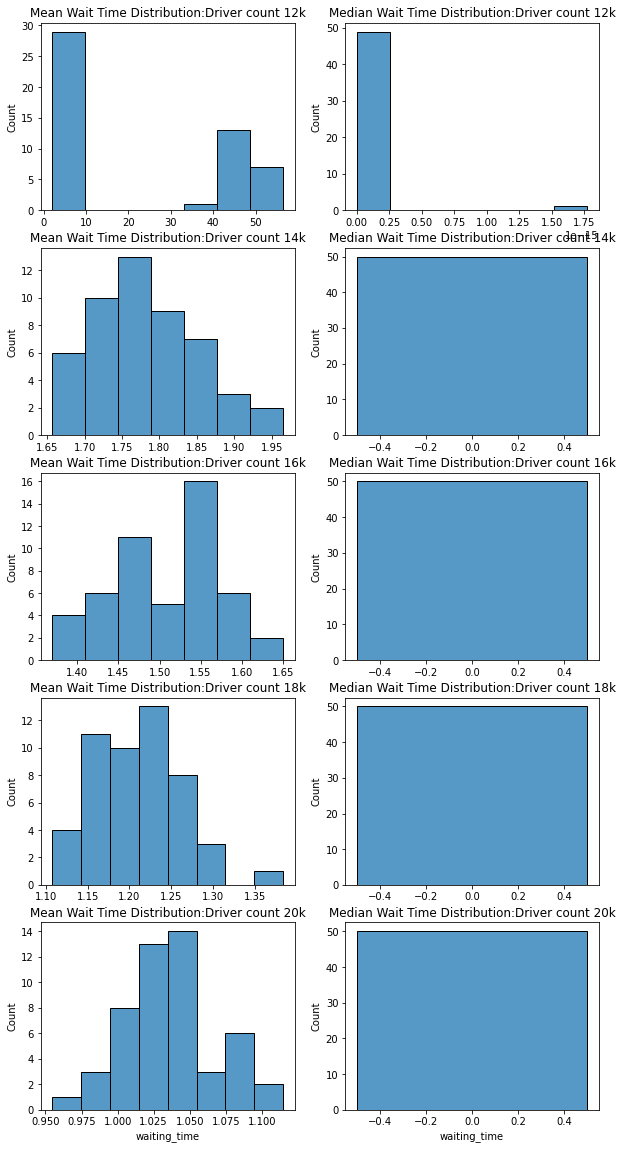

In [27]:
#get a look at the average wait time distribution
f, ax = plt.subplots(len(passenger_details),2, figsize=(10,20))

for p, plot_ax, num_drivers in zip(passenger_details, ax, range(12, 22, 2)):
    graph_wait_times(p, plot_ax[0], plot_ax[1], f':Driver count {num_drivers}k', last_axis = num_drivers == 20)
    
plt.savefig('output/simulation_analysis/mean_median_wait_times', bbox_inches = 'tight')

In [69]:
def graph_wait_time_hourly(p, ax, unique_title, last_axis = False):
    hourly_wait_times = p.groupby(['replication','arrival_hour']).waiting_time.mean().reset_index()
    
    sns.lineplot(data = hourly_wait_times, x = 'arrival_hour', y = 'waiting_time', hue = 'replication', ax = ax)
    ax.set_title('Hourly Mean Wait Time' + unique_title)
    if not last_axis:
        ax.set_xlabel('')
        ax.set_xticks([])

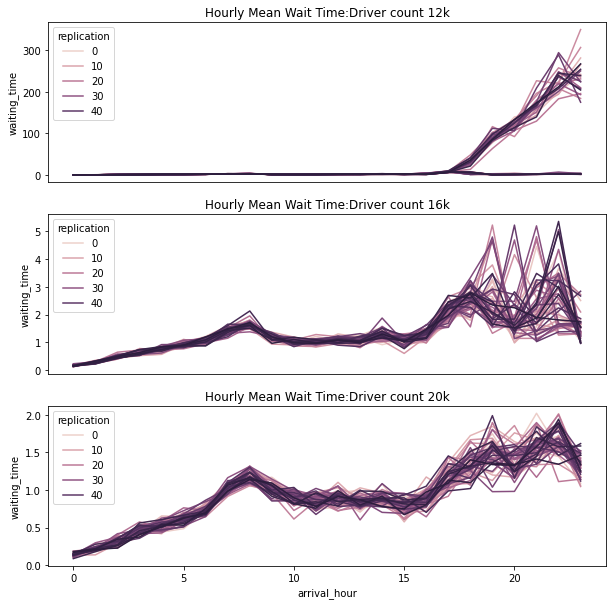

In [77]:
f, ax = plt.subplots(len(passenger_details[::2]),1, figsize=(10,10))

for p, plot_ax, num_drivers in zip(passenger_details[::2], ax, [12,16,20]):
    graph_wait_time_hourly(p, plot_ax, f':Driver count {num_drivers}k', last_axis = num_drivers == 20)
    
plt.savefig('output/simulation_analysis/hourly_wait_time', bbox_inches = 'tight')

In [63]:
mean_wait_times = []
median_wait_times = []
for p in passenger_details:
    mean_wait_times.append(p.groupby('replication').waiting_time.mean())
    median_wait_times.append(p.groupby('replication').waiting_time.median())

In [64]:
mean_wait_times[0]

replication
0      2.091379
1      2.197312
2      2.092788
3     45.350529
4      2.244353
5      2.226255
6      2.132490
7     46.529015
8      2.309431
9      2.251526
10     2.166427
11    46.969804
12    46.413024
13     2.202227
14     2.434330
15    56.476434
16    52.941499
17    42.909159
18    52.356294
19     2.212833
20    37.614750
21     2.180770
22    46.805590
23     2.152672
24     2.517000
25     2.255348
26    45.902708
27    43.266387
28     2.187853
29     2.267572
30     2.145313
31     2.320258
32     2.144401
33     2.585184
34    45.650031
35    50.605720
36    46.181617
37    51.066384
38    48.196093
39     2.254184
40     2.117499
41     2.421236
42     2.195094
43     2.138036
44    46.994736
45    50.256443
46    43.370240
47     2.225621
48     2.171058
49    48.837716
Name: waiting_time, dtype: float64

In [65]:
np.mean(mean_wait_times, axis = 1)

array([21.19069241,  1.78169589,  1.51084415,  1.20993825,  1.03602533])

In [66]:
np.set_printoptions(suppress=True)
np.var(mean_wait_times, axis = 1)

array([502.86122184,   0.00486453,   0.00391576,   0.00289289,
         0.0010704 ])

In [67]:
np.median(median_wait_times, axis = 1)

array([0., 0., 0., 0., 0.])